In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

# This is an example of using Python calculate and plot the motion of a pendulum hanging
# from the axel of a wheel rolling down a plane
Order of variables in the array u[]:
*   0: xi   
*   1: dxi/dt
*   2: theta   
*   3: dtheta/dt

In [2]:
# Parameters describing the system
L = 0.25                  # pendulum length
g = 9.8                   # acceleration of gravity in m/s^2
m = 1                     # mass of the pendulum and of the wheel
alpha = 45*math.pi/180.   # plane angle in radians
R = 0.5                   # radius of the wheel


In [3]:
# Assign initial conditions to the motion.
xi0 = 0                              # initial position (y increases down the plane)
pxi0 = 0.                            # initial x momentum
phi0 = 80*math.pi/180.               # initial angle of the pendulum
pphi0 = 0.                           # initial phi momentum
u0 = [xi0, pxi0, phi0, pphi0]    # initial conditions for all 4 variables

In [4]:
# # This function gives the time derivative of each of the 4 variables. These correspond to the
# # four Hamilton equations of motion (1st-order differential equations)
# def dudt(u, t):  # the u[ ] are the coordinates and momenta [xi, p_xi, phi, p_phi]
#     r = [0., 0., 0., 0.]  # the r[ ] are the time derivatives 
#     # enter the time derivative of xi
#     r[0] = (2/(5-2*(np.cos(u[2]+alpha)**2)))*((u[1]/m)-((u[3]*np.cos(u[2]+alpha))/(m*L)))   
    
#     # enter the time derivative of p_xi
#     r[1] =  2*m*g*np.sin(alpha) 
    
#     # enter the time derivative of phi
#     r[2] =  (2/(5-2*(np.cos(u[2]+alpha)**2)))*((5*u[3]/(2*m*(L**2)))-((u[1]*np.cos(u[2]+alpha))/(m*L)))
    
#     # enter the time derivative of p_phi
#     r[3] = (-4*u[1]**2*np.cos(u[2]+alpha)*np.sin(u[2]+alpha))/(m*(2*np.cos(u[2]+alpha)**2-5)**2)
#     r[3] += (-10*u[3]**2*np.cos(u[2]+alpha)*np.sin(u[2]+alpha))/(L**2*m*(2*np.cos(u[2]+alpha)**2-5)**2)
#     r[3] += ((2*u[1]*u[3]*np.sin(u[2]+alpha)*(2*(np.cos(u[2]+alpha)**2)))/(L*m*(2*(np.cos(u[2]+alpha)**2)-5)**2)) + (m*g*L*np.sin(u[2]))
#     return r

In [5]:
# This function gives the time derivative of each of the 4 variables. These correspond to the
# four Hamilton equations of motion (1st-order differential equations)
def dudt(u, t):  # the u[ ] are the coordinates and momenta [xi, p_xi, phi, p_phi]
    r = [0., 0., 0., 0.]  # the r[ ] are the time derivatives 
    b = u[2]+alpha
    c = (np.cos(b)**2)
    # enter the time derivative of xi
    r[0] = (2/(5-2*(np.cos(b)**2)))*((u[1]/m)-((u[3]*np.cos(b))/(m*L)))   
    
    # enter the time derivative of p_xi
    r[1] =  2*m*g*np.sin(alpha) 
    
    # enter the time derivative of phi
    r[2] =  (2/(5-2*(c)))*((5*u[3]/(2*m*(L**2)))-((u[1]*np.cos(b))/(m*L)))
    
    # enter the time derivative of p_phi
    r[3] = -((u[1]**2/m)+((5*u[3]**2)/(2*m*L**2)))*((-4*np.cos(b)*np.sin(b))/((2*c-5)**2))
    r[3] += -((2*u[1]*u[3]*np.sin(b)*(2*c+5))/(L*m*((2*c-5)**2)))
    r[3] += - (m*g*L*np.sin(u[2]))
    return r

In [6]:
# Use the scipy odeint routine to carry out the numerical integration of the system of equations.
tau = 2.*math.pi*math.sqrt(L/g)
t0 = 0.                   # start time
t1 = 2.0*tau              # end time
N = 400                   # number of time steps

# Choose a set of time values at which to evaluate the solution y(t)
t = np.arange(t0,t1, (t1-t0)/N)

# Call the routing from scipy that does the integration
u = odeint(dudt, u0, t)

font = {'size'   : 18}
plt.rc('font', **font)

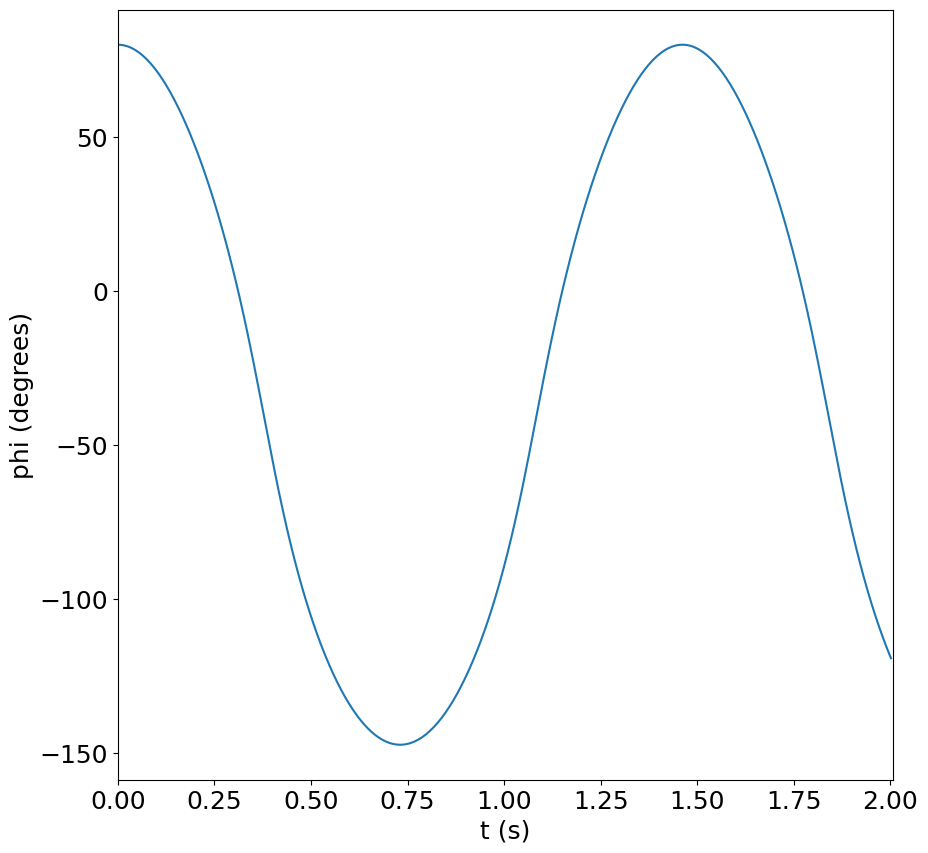

In [7]:
# Plot the motion phi(t)
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel('phi (degrees)')
ax.plot(t,u[...,2]*180./math.pi)
plt.show()

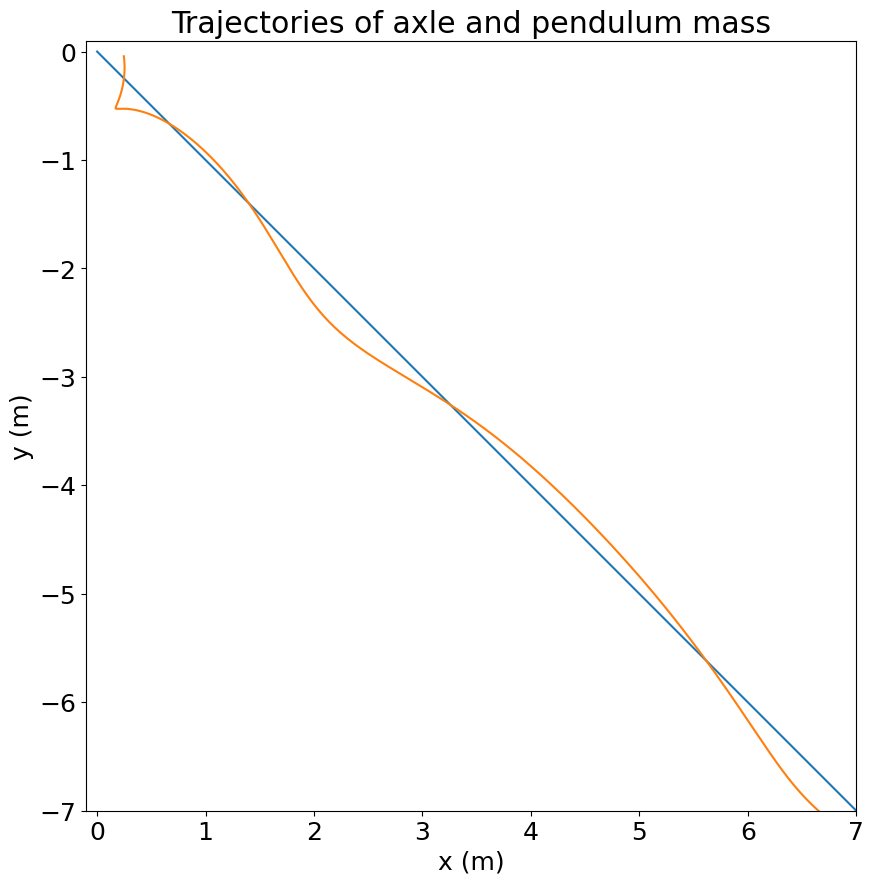

In [8]:
# Calculate and plot the 2D trajectories of the pendulum mass and axle
XA = np.zeros(N)
YA = np.zeros(N)
XP = np.zeros(N)
YP = np.zeros(N)
for i in range(N):
    XA[i] = u[i,0]*math.cos(alpha)
    YA[i] = -u[i,0]*math.sin(alpha)
    XP[i] = XA[i] + L*math.sin(u[i,2])
    YP[i] = YA[i] - L*math.cos(u[i,2])  
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-.1, 7.)
plt.ylim(-7., 0.1)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect('equal')
ax.plot(XA,YA)
ax.plot(XP,YP)
plt.title("Trajectories of axle and pendulum mass")
plt.show()

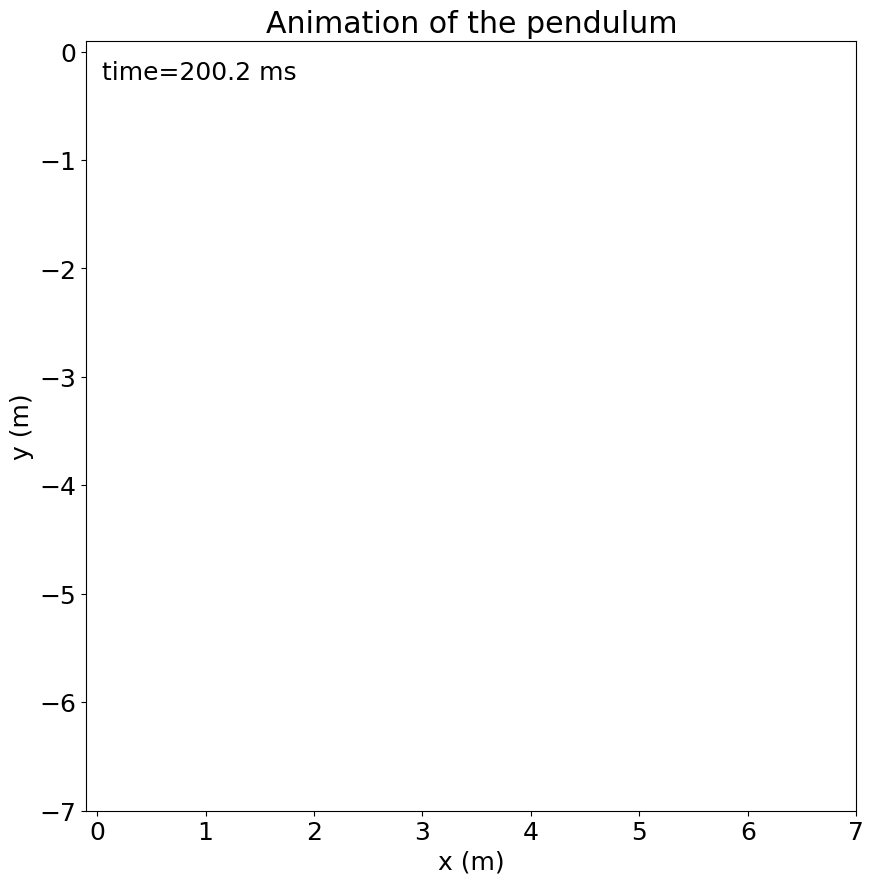

In [9]:
# Now use matplotlib to make an animation of the motion
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(-.1, 7.), ylim=(-7., .1))
line, = ax.plot([],[],lw=2)
ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.title("Animation of the pendulum")
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_step = 1000.*(t1-t0)/N/10.    # Speed up time by a factor of 10 here

def init():
    line.set_data([],[])
    time_text.set_text('')
    return line, time_text

def animate(i):
    XPL = [XA[i],XP[i]]
    YPL = [YA[i],YP[i]]
    line.set_data(XPL,YPL)
    time = i*time_step
    time_text.set_text('time=%.1f ms' % time)
    return line, time_text

# The animation is created here    
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=N, interval=time_step, blit=True)

# Save the animation to an mpeg file. This requires ffmpeg to be installed,
# with the executable in the PATH
anim.save('doublePendulumwheel.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
   
# Display the animation
plt.show()